# Bank Telemarketing Campaign

## Introduction
A bank wants to increase its revenue by attracting more customers to long-term deposits. It aims to identify among its existing customers those who are most likely to sign up for long-term deposits when contacted in a telemarketing campaign. By focusing their efforts on those customers most likely to sign up, marketers would be much more successful regarding its conversion rates.

## Initial Statements
We start by importing all packages that will be used through out this case study as well as our data set.

In [38]:
#Standard imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate

In [40]:
#set notebook environment
%precision %.2f
pd.options.display.float_format = "{:,.2f}".format
pd.set_option('display.width', 100, 'display.max_rows', 81)

plt.rcParams.update({'font.size': 22})

# Don't wrap repr(DataFrame) across additional lines
pd.set_option("display.expand_frame_repr", False)

%matplotlib inline
plt.style.use("ggplot")

In [48]:
df = pd.read_csv("./Datasets/bank-additional/bank-additional-full.csv", sep=";")

## EDA(Exploratory Data Analysis)

### Getting to know your data

In [52]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
31423,34,blue-collar,married,basic.9y,no,yes,no,cellular,may,wed,...,3,999,1,failure,-1.80,92.89,-46.20,1.33,"5,099.10",no
3702,29,technician,married,university.degree,no,no,no,telephone,may,fri,...,3,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
37290,63,housemaid,married,basic.4y,no,yes,no,telephone,aug,mon,...,1,6,2,failure,-2.90,92.20,-31.40,0.88,"5,076.20",yes
28336,34,services,divorced,high.school,no,yes,yes,cellular,apr,wed,...,1,999,1,failure,-1.80,93.08,-47.10,1.45,"5,099.10",no
34630,33,technician,single,professional.course,no,no,no,cellular,may,thu,...,2,999,0,nonexistent,-1.80,92.89,-46.20,1.27,"5,099.10",no


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The used dataset was collected from a telemarketing campaign by a Portuguese banking institution. Occasionally, customers were contacted more than once, in order to attempt to sell Term Deposit subscriptions. The Bank Marketing dataset includes 41188 records, with 21 observations per record. Each record includes 20 explanatory observations about the client contacted, and 1 response observation of whether the client subscribed to a Term Deposit or not.

Customer data:
    
1. `age` (numeric)
2. `job` : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
3. `marital` : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. `education` (categorical: basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. `default`: indicates if the client has credit in default  (categorical: 'no','yes','unknown')
6. `housing`:  does the client has a housing loan? (categorical: 'no','yes','unknown')
7. `loan`: does the client has a personal loan? (categorical: 'no','yes','unknown')

Telemarketing data:

8. `contact`: contact communication type (categorical: 'cellular','telephone')
9. `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. `day_of_week`: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. `duration`: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other data

12. `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. `previous`: number of contacts performed before this campaign and for this client (numeric)
15. `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Socioeconomic data:

16. `emp.var.rate`: employment variation rate - quarterly indicator (numeric)
17. `cons.price.idx`: consumer price index - monthly indicator (numeric)
18. `cons.conf.idx`: consumer confidence index - monthly indicator (numeric)
19. `euribor3m`: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21. `y`: has the client subscribed a term deposit? (binary: 'yes','no')

We are dealing with a tidy data set without missing values, but with some "unknown" values, which we will keep as such to gain more accurate overview over the customers behavior.

<div class="alert alert-block alert-warning">
    <b>Principles of tidy data:</b>
    <ul>
        <li>Every column is a variable.</li> 
        <li>Every row is an observation.</li>
        <li>Every cell is a single value.</li>
    </ul>
</div>

**Messy data** is any other arrangement of the data.

More important than tidy data is the quality of your data, since it can have much more devastating consequences for a data analyst's reputation. Indeed, the results of an analysis cannot be better than the data it uses. Following the maxim: *garbage in, garbage out*. Perhaps the most common problem concerning the quality of the data is biased data selection. There are some techniques that help you avoid this kind of errors, specially when you are dealing with samples of data.

### Univariate data analysis

Univariate analysis is the study of a single feature or variable that provides us with an overall view of how the data is organized. 
Let's start first by analyzing the  categorical data:

In [66]:
categorical_columns = df.select_dtypes(include = 'object').columns

In [74]:
for col in categorical_columns:
    print(f'* Unique values in column "{col}":')
    print(
        pd.concat([df[col].value_counts(), df[col].value_counts(normalize = True).mul(100)],
                  axis = 1, keys = ("counts", "percent %")
                 )
    )
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

* Unique values in column "job":
               counts  percent %
job                             
admin.          10422      25.30
blue-collar      9254      22.47
technician       6743      16.37
services         3969       9.64
management       2924       7.10
retired          1720       4.18
entrepreneur     1456       3.54
self-employed    1421       3.45
housemaid        1060       2.57
unemployed       1014       2.46
student           875       2.12
unknown           330       0.80
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
* Unique values in column "marital":
          counts  percent %
marital                    
married    24928      60.52
single     11568      28.09
divorced    4612      11.20
unknown       80       0.19
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
* Unique values in column "education":
                     counts  percent %
education                             
university.degree     12168      29.54
high.school            9515 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Target Distribution')

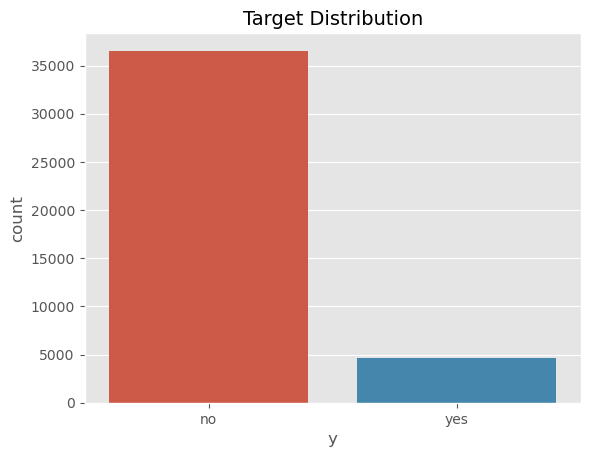

In [76]:
sns.countplot(x = 'y', data = df)
plt.title("Target Distribution", fontsize = 14)

In [96]:
for col in df.select_dtypes(include = 'object').columns:
    df[col] = df[col].astype('category')

In [99]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curre

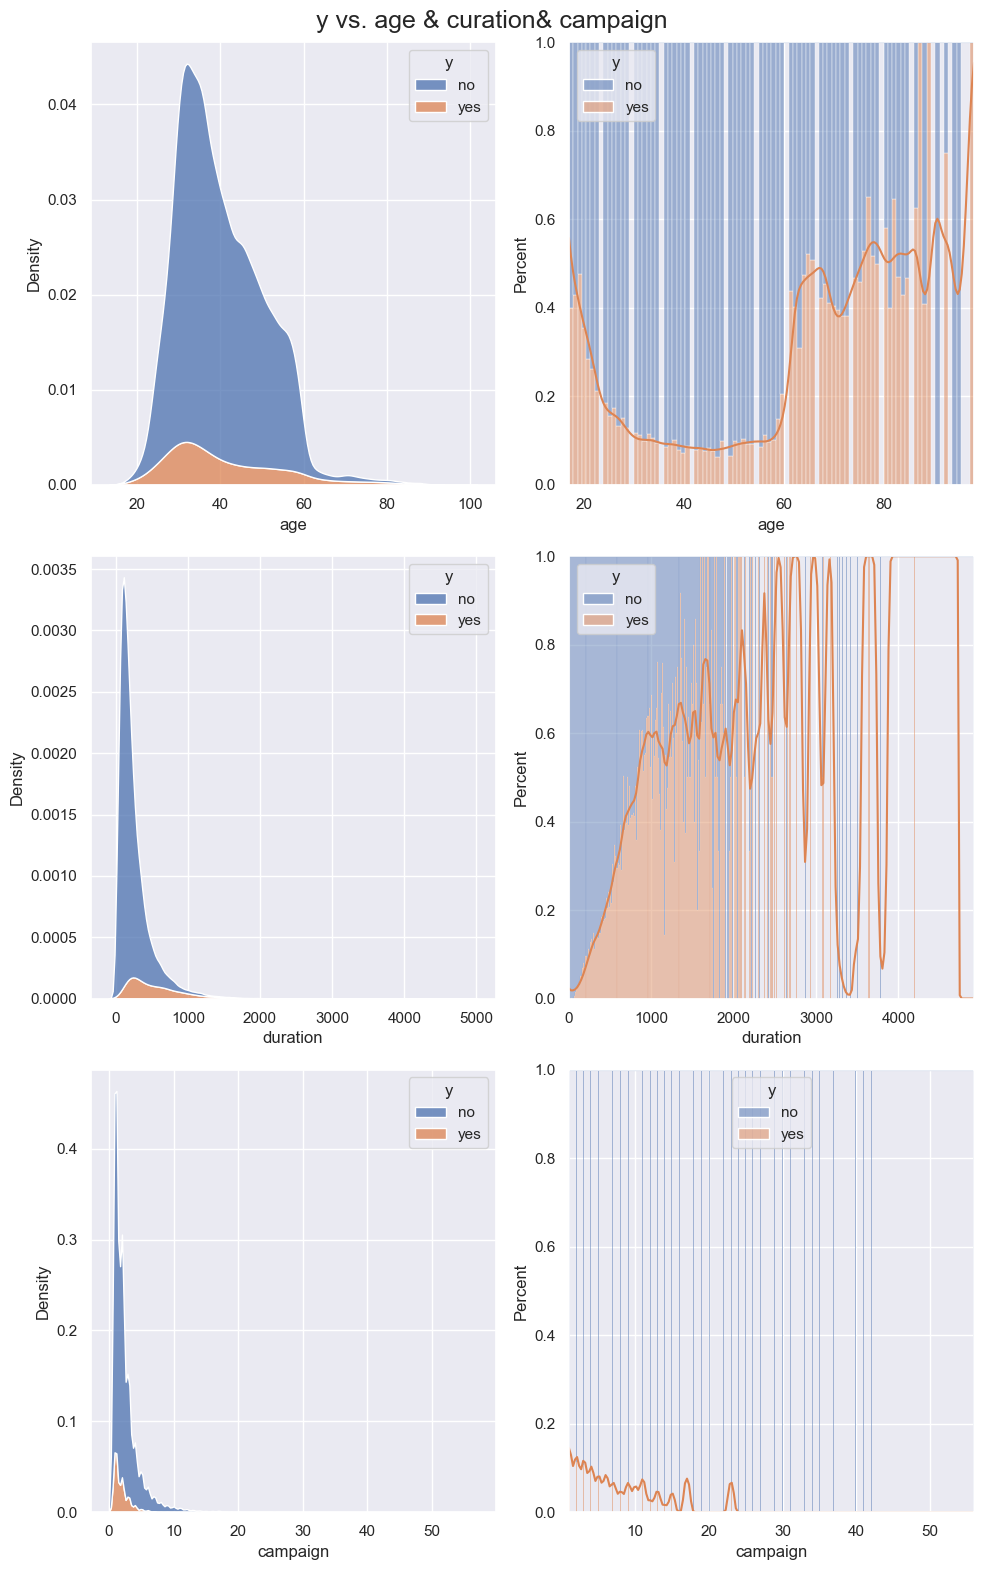

In [106]:
sns.set(style='darkgrid', context='notebook', rc={"figure.figsize":(10, 16)})

# create a figure with 4 axes 
fig, ax = plt.subplots(nrows=3, ncols=2)
var_list = ['age', 'duration', 'campaign']

for i, var in enumerate(var_list):
    g = sns.histplot(data=df, x=var,multiple='fill', hue='y',
                 stat='percent', kde=True, ax=ax[i, 1])
    sns.kdeplot(data=df, x=var, hue='y', multiple='stack', 
                ax=ax[i, 0])
    
plt.suptitle('y vs. age & curation& campaign', fontsize=18)
plt.tight_layout();